In [2]:
# Step 1: Loading and Exploring the Dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

First 5 Rows:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Summary Statistics:
           R&D Spend  Administration  Marketing Spend  

Based on the provided summary statistics for the 50_Startups (3).csv dataset, here are key insights in 3-4 bullet points:

- Wide Range in Features: R&D Spend (0 to 165,349.2) and Marketing Spend (0 to 471,784.1) show high variability with some startups spending nothing, indicating potential outliers or diverse business models. Profit ranges from 14,681.4 to 192,261.83, suggesting significant variation in startup success.
- Skewed Distributions: The large standard deviations (R&D Spend: 45,902.26, Marketing Spend: 122,290.31) compared to their means (73,721.62 and 211,025.10) suggest right-skewed distributions, with a few startups investing heavily.
- Administration Costs Less Variable: Administration has a narrower range (51,283.14 to 182,645.56) and lower standard deviation (28,017.80), indicating more consistent spending across startups compared to R&D and Marketing.
- Profit Central Tendency: The median Profit (107,978.19) is close to the mean (112,012.64), suggesting a relatively symmetric profit distribution, though extreme values (min: 14,681.4) may warrant outlier investigation.

In [5]:
# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


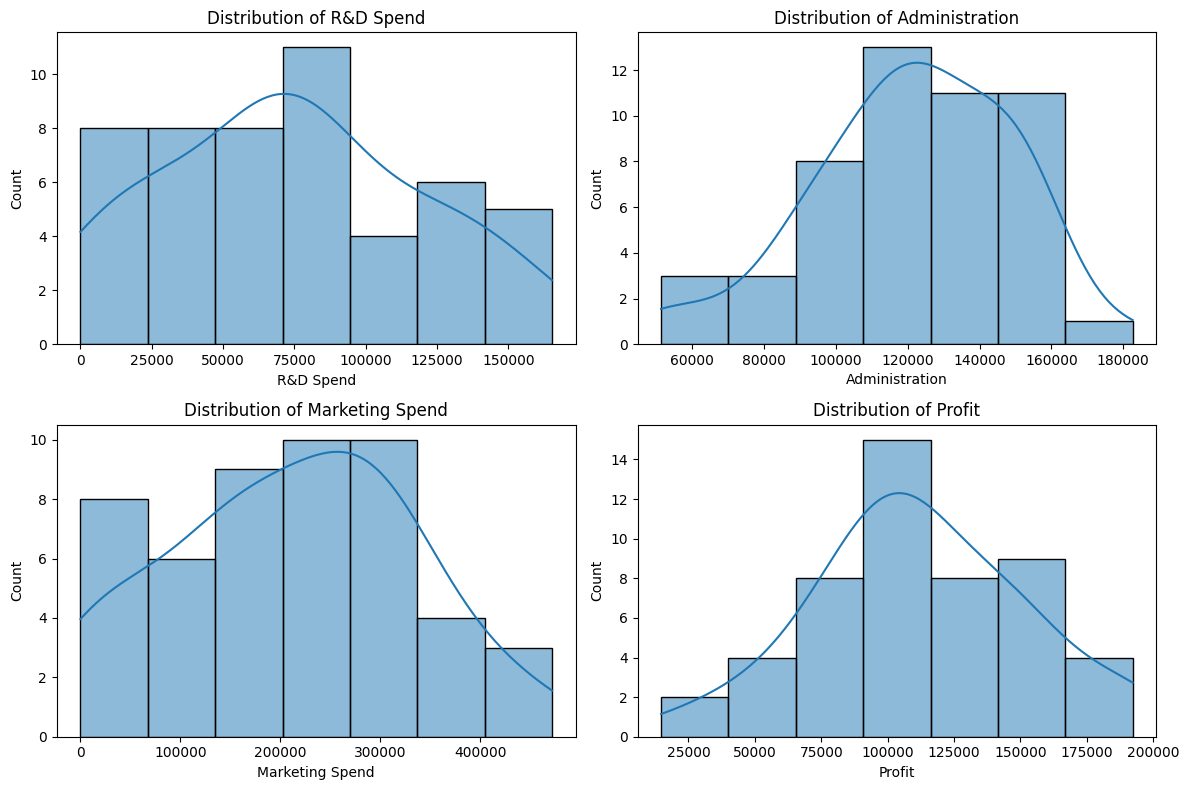

In [6]:
# Visualize distributions of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

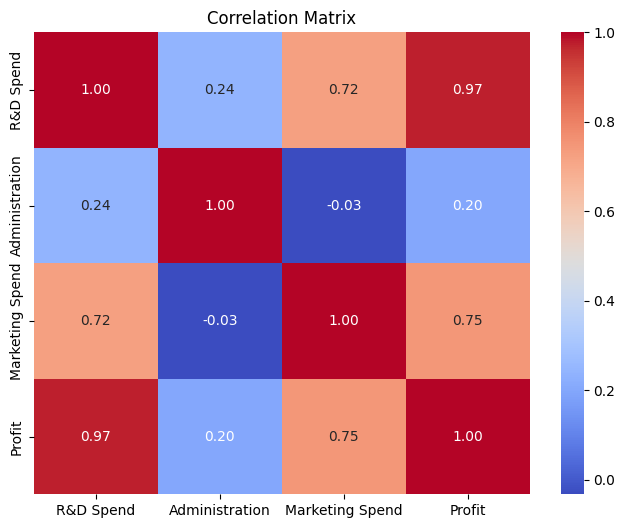

In [7]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

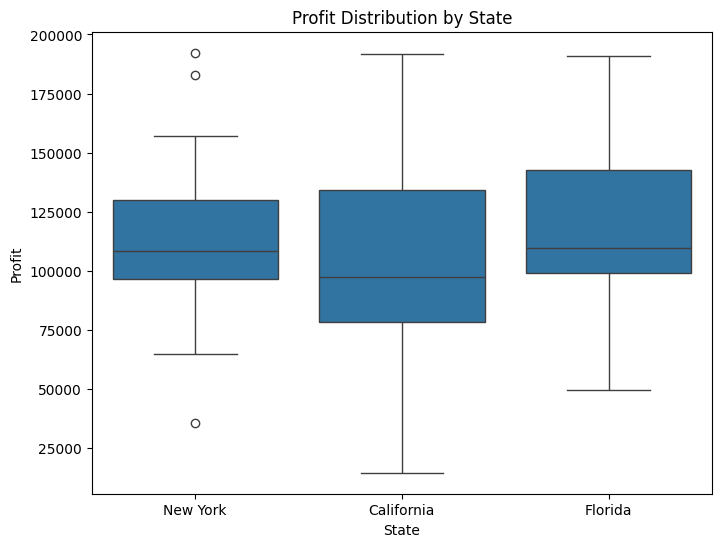

In [8]:
# Visualize Profit by State
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit Distribution by State')
plt.show()

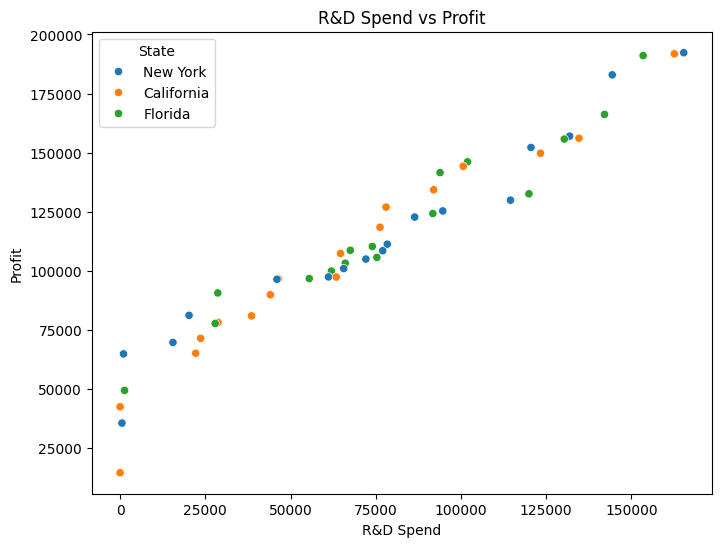

In [9]:
# Scatter plot of R&D Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D Spend', y='Profit', hue='State', data=df)
plt.title('R&D Spend vs Profit')
plt.show()

In [10]:
# Step 3: Data Preprocessing
# Encode categorical 'State' column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

In [12]:
df_encoded

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


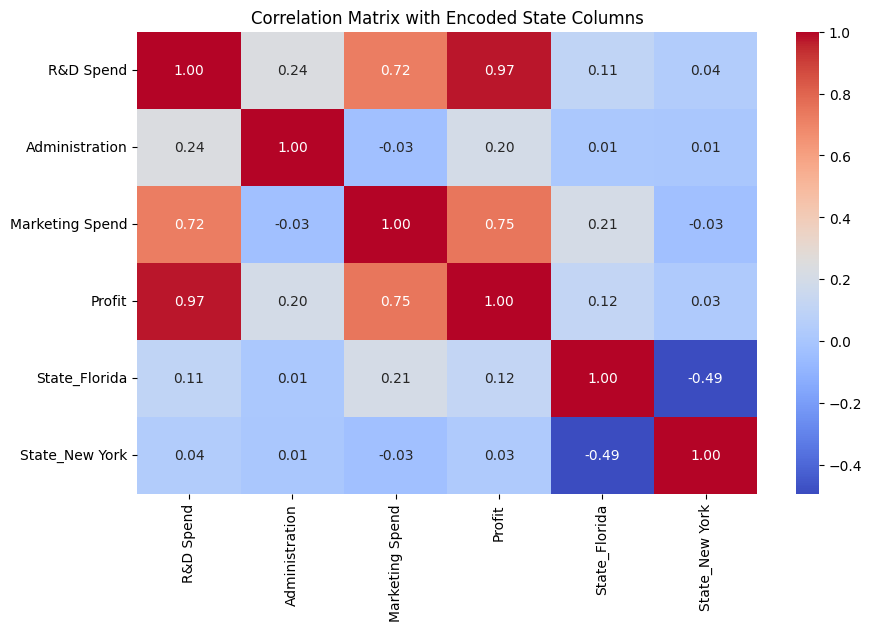

In [13]:
# Generate correlation matrix for all features including encoded State columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Encoded State Columns')
plt.show()

In [14]:
# Define features (X) and target (y)
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

In [15]:


# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [16]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Building Linear Regression Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [17]:
# Step 5: Evaluating the Model
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")




Model Performance Metrics:
R² Score: 0.8987
Mean Squared Error (MSE): 82010363.05
Mean Absolute Error (MAE): 6961.48


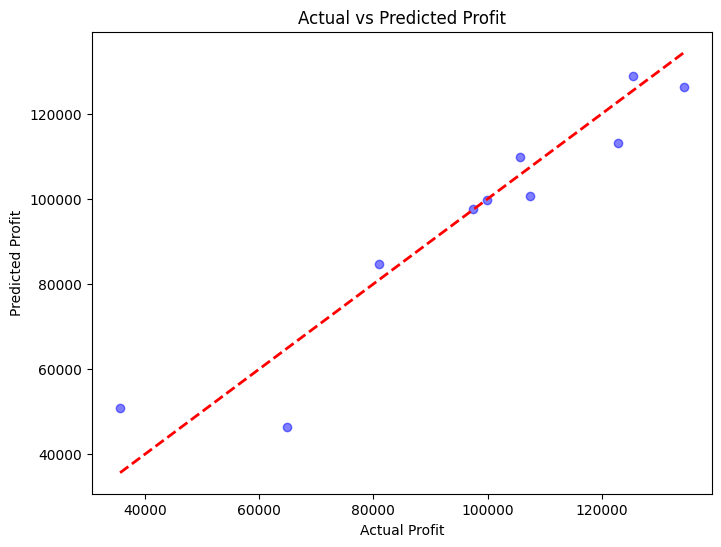

In [18]:
# Optional: Visualize actual vs predicted profits
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

### Model with just: R&D Spend and Marketing Spend

Dataset Info (Reduced):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Marketing Spend  50 non-null     float64
 2   Profit           50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
None

First 5 Rows:
   R&D Spend  Marketing Spend     Profit
0  165349.20        471784.10  192261.83
1  162597.70        443898.53  191792.06
2  153441.51        407934.54  191050.39
3  144372.41        383199.62  182901.99
4  142107.34        366168.42  166187.94

Summary Statistics:
           R&D Spend  Marketing Spend         Profit
count      50.000000        50.000000      50.000000
mean    73721.615600    211025.097800  112012.639200
std     45902.256482    122290.310726   40306.180338
min         0.000000         0.000000   14681.400000
25%     39936.370000    129300.132500   90138.902500

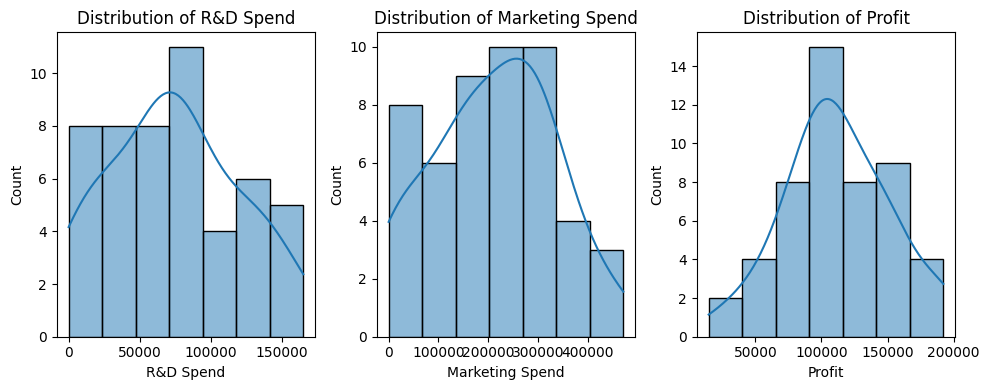

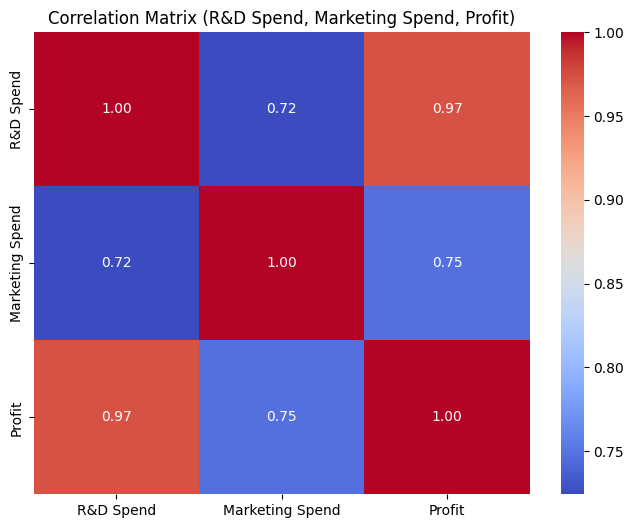


Variance Inflation Factor (VIF):
           Feature       VIF
0        R&D Spend  2.103206
1  Marketing Spend  2.103206
2            const  4.310924


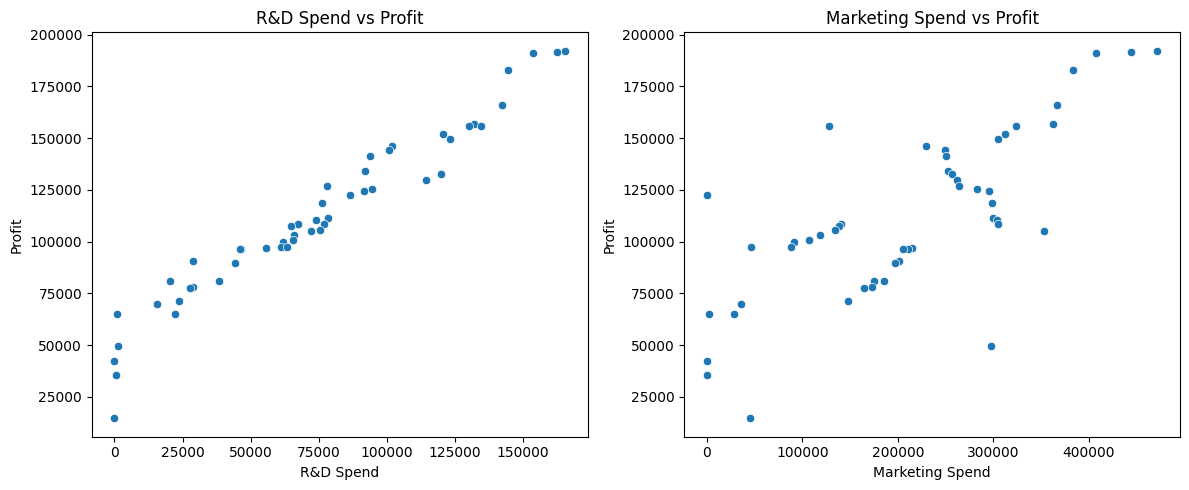


Model Performance Metrics:
R² Score: 0.9168
Mean Squared Error (MSE): 67343832.59
Mean Absolute Error (MAE): 6469.18


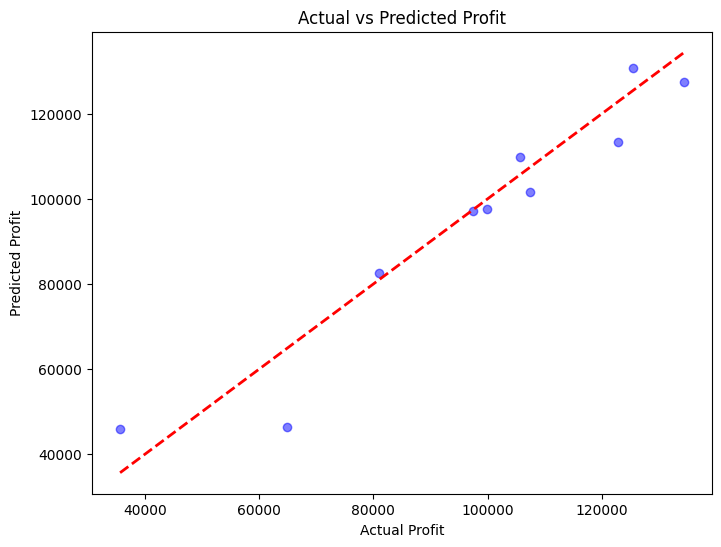

In [19]:
# Step 1: Loading and Exploring the Dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Select only relevant features and target
df_reduced = df[['R&D Spend', 'Marketing Spend', 'Profit']]

# Display basic information about the dataset
print("Dataset Info (Reduced):")
print(df_reduced.info())
print("\nFirst 5 Rows:")
print(df_reduced.head())
print("\nSummary Statistics:")
print(df_reduced.describe())

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(df_reduced.isnull().sum())

# Visualize distributions of numerical features
plt.figure(figsize=(10, 4))
for i, column in enumerate(['R&D Spend', 'Marketing Spend', 'Profit'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_reduced[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (R&D Spend, Marketing Spend, Profit)')
plt.show()

# Check for multicollinearity using Variance Inflation Factor (VIF)
X_vif = df_reduced[['R&D Spend', 'Marketing Spend']].assign(const=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Scatter plots of features vs Profit
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='R&D Spend', y='Profit', data=df_reduced)
plt.title('R&D Spend vs Profit')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Marketing Spend', y='Profit', data=df_reduced)
plt.title('Marketing Spend vs Profit')
plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing
# Define features (X) and target (y)
X = df_reduced[['R&D Spend', 'Marketing Spend']]
y = df_reduced['Profit']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Building Linear Regression Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluating the Model
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Visualize actual vs predicted profits
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

**Is the New Model Better?**

- The new model is better based on all three metrics:

- Higher R² (0.9168 vs. 0.8987): The new model explains more variance in Profit, achieving a closer fit to the data.
- Lower MSE (67,343,832.59 vs. 82,010,363.05): The new model has smaller prediction errors, improving accuracy.
- Lower MAE (6,469.18 vs. 6,961.48): The new model’s predictions are closer to actual values on average, enhancing practical utility.

- **Why it’s better:** Removing Administration and State likely eliminated features with low predictive power (e.g., Administration may have weak correlation with Profit, and State showed minimal impact in EDA). R&D Spend (likely ~0.97 correlation with Profit) and Marketing Spend dominate the model’s performance, making the simpler model more effective and less prone to overfitting on a small dataset (50 samples).